## Principal Component Analysis on US Arrests

The US arrests dataset contains data regarding the number of crimes per 100 000 individuals that occur in each state of America in 1973. There are 4 variables for each state, the number of murders, assault, rape and the urban population in that state. This Notebook, will perform explorative data analysis, principal component analysis and two clustering methods. 

In [1]:
# Import the required packages for
# data analysis, mathematical operations
# ploting and visualising graphs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Import required packages to perform
# Agglomerative & KMeans clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Import the required functionalities to visualise
# the clusters and linkages between the data points
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data into a DataFrame
arrests_df = pd.read_csv('UsArrests.csv')

# preview the DataFrame
arrests_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The preview above shows that per city, there are columns containing the number of murders, assualts and rapes that took place and the urban population of that city. Each variable has an intuitive name. Let's analyse the data.

#### Data Analysis

In [2]:
# Determine the shape of the DataFrame
arrests_df.shape

(50, 5)

There are a total of 50 rows and 5 columns in the DataFrame.

In [3]:
# View the datatypes of each variable
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Generate statistical description of the data
arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
# Locate any missing values
print(arrests_df.isnull().sum())

print('The total number of unknown cities is:')
print(arrests_df['City'].isna().sum())

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64
The total number of unknown cities is:
0


There are no missing values within the DataFrame. 

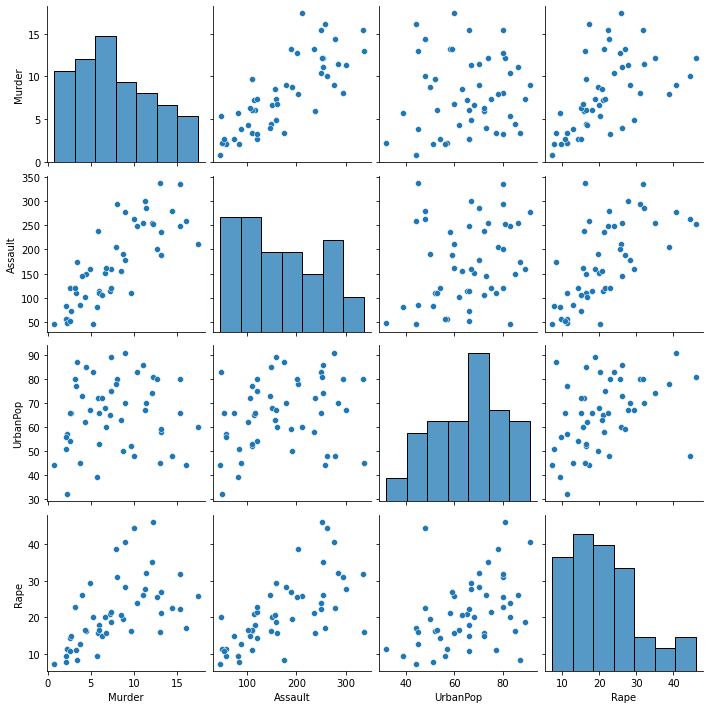

In [6]:
# View the spread of the data by plotting histograms 
# for each variable, and the relationship among the 
# variables by plotting scatterplots
# Use seaborn pairplot() function
sns.pairplot(arrests_df)

The diagonal in the grid above indicate histrograms for each single variable, showing us the distribution of each variable. The variables 'Murder', 'Assualt' and 'Rape' are positively skewed. The 'UrbanPop' variable appears to have unijform distribution but is slightly negatively skewed. The upper and lower triangle contain scatter plots showing the relationship or lack of relationship between two variables. There seems to be no relationship between UrbanPop and Murder, and UrbanPop and Assualt. There is a positive relationship between; Murder and Rape, Murder and Assault, and Assault and Rape.

<AxesSubplot:xlabel='UrbanPop', ylabel='City'>

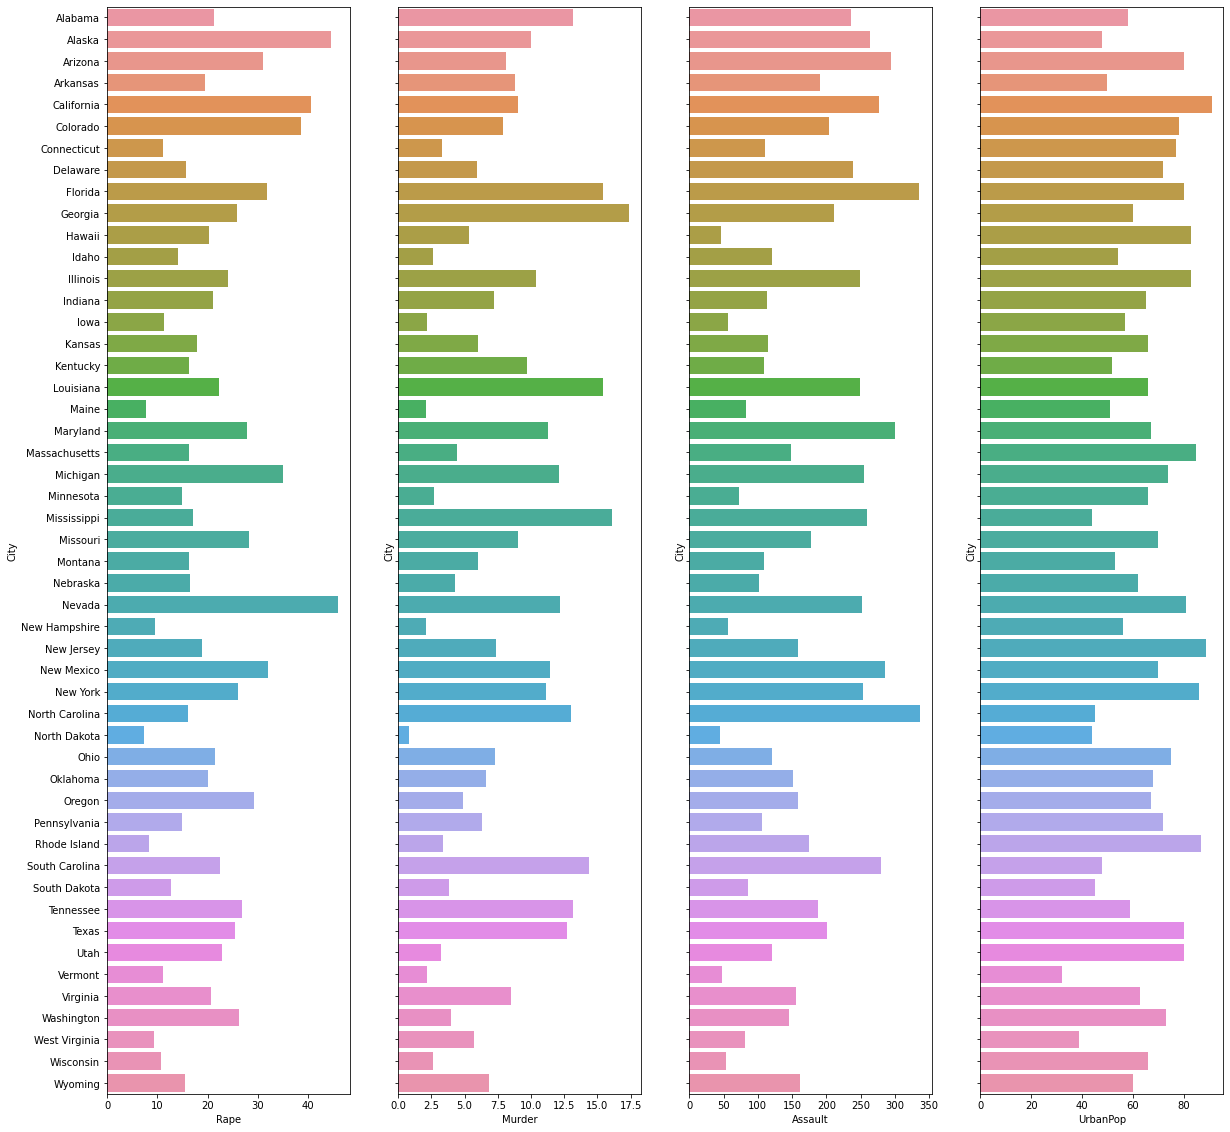

In [7]:
# View the which cities have the highest rapes
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20,20))
sns.barplot(ax=axes[0], y='City', x='Rape', data = arrests_df)

# View the which cities have the highest murders
sns.barplot(ax=axes[1], y='City', x='Murder', data = arrests_df)

# View the which cities have the highest assualts
sns.barplot(ax=axes[2], y='City', x='Assault', data = arrests_df)

# view the urban population of each city 
sns.barplot(ax=axes[3], y='City', x='UrbanPop', data = arrests_df)

The first three horizontal bar graphs above indicate the number of Rape, Assaults and Murders that take place per 100 000 individuals in each state. One can see in which state does the most or the least crime occur. The fourth horizontal bar graph indicates the percentage of the population that stays in urban areas. For example less than 40 % of the population in Vermont stay in urban areas compared to more than 80% of the population in New Jersey that lives in urban areas.

<AxesSubplot:>

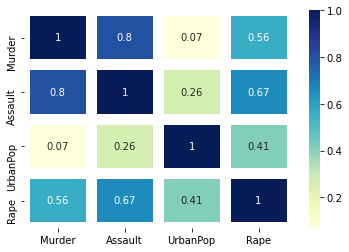

In [8]:
# Compute the correlation among the variables by 
# the use of the function corr()
corr = arrests_df.corr()

# Visualise the correlation matrix through a heatmap
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidth=10)

The heatmap above illustrates the correlation between the variables. A correlation value of 0.07 between Murder and UrbanPop is near zero, indicating that these variables are uncorrelated. If UrbanPoP increases there is no way of saying that the number of murders will also increase. This is evident also from the scatter plot above where no relationship can be deciphered. The number of murders that occur in a given state are not correlated to the urban population of that same state. A correlation value of 0.8 between Murder and Assault is a near perfect positive correlation, this can mean that the higher the assualt the higher the number of murders that occur in a given state.

### Principal Component Analysis

Principal Component Analysis is a dimensionality reduction method used to transform a large set of variables into smaller one that still contains most of the information of the original dataset. A reduced set a variables makes it easier to explore and visualise and allows for much faster processing of machine learning algortihms. Standardize the variables before performing the prinicipal component analysis. The UrbanPop variable measures the percentage of the population that lives in urban areas. We cannot compare this variable to the other variable in the data set; Murder, Rape and Assault which measure the number of crimes committed per 100,000 people. Hence let's standardize the data.

In [9]:
# Drop the 'City' column
features_df = arrests_df.drop(columns=['City'])

# Standardize the four variables
X = StandardScaler().fit_transform(features_df.values)

# view the standardize variables
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
# Choose n_components to equal 4
# Initialise the PCA model
pca = PCA(n_components =4)

# get the components by fitting the above
# standardized feature variables
principal_components = pca.fit_transform(X)

# Generate a dataframe of the principal components
pca_df = pd.DataFrame(principal_components, index=arrests_df.index)

# View the dataframe
pca_df

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


In [11]:
# Calculate the explained_variance_ratio 
# for each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.62006039 0.24744129 0.0891408  0.04335752]


The values above indicate that the first principal component accounts for 62% of the variation in the data, the second principal component accounts for 24.7% of the variation, while the third and fourth components account for the remaining 13.3% variation of the data. The first and second combined account for 86,7% of the variation. Let's compute the correlation between the principal components and the original data.

<AxesSubplot:>

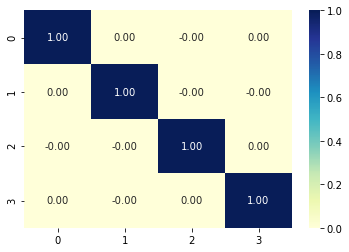

In [12]:
# Plot the heatmap to visualise the correlation
# between the principal components
sns.heatmap(pca_df.corr(), annot=True, cmap='YlGnBu', fmt = '.2f')

The above heatmap indicates that all four principal components are uncorrelated to one another. Let's visualise the correlation between the principal components and the orginal variables.

<AxesSubplot:>

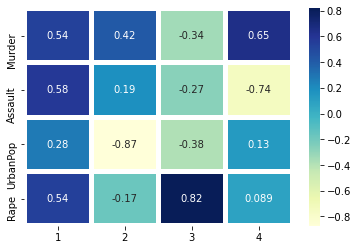

In [13]:
# Plot the correlation of the principal components against the orginal variables.
# Transpose the DataFrame for readibility.
components = pd.DataFrame(pca.components_, columns=features_df.columns, index=range(1, 5)).transpose()

# Use seaborn heatmap to visualise the correlation.
sns.heatmap(components, annot=True, cmap='YlGnBu',linewidth=4)


The first loading vector places approximately equal weight on Assault, Murder, and Rape, with much less weight on UrbanPop. Hence this component roughly corresponds to a measure of overall rates of serious crimes.
The second loading vector places most of its weight on UrbanPop and much less weight on the other three features. Hence, this component roughly corresponds to the level of urbanization of the state.

In order to choose the number of principal components required, generate a scree plot, with variance explained on the x-axis and variance explained on the y-axis. The point of inflection on the elbow curve will indicate the number of principal components required to explain the maximum amount of variance. 

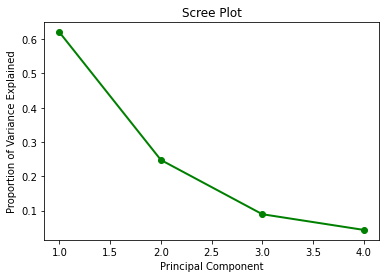

In [14]:
# Define the range of the number of components
PC_values = np.arange(pca.n_components_) + 1

# The number of components is plotted on the x-axis,
# the variance explained is plotted on the y-axis
plt.plot(PC_values, pca.explained_variance_ratio_, 'go-', linewidth=2)

# Define the plots title
plt.title('Scree Plot')

# Define the labels of the axes
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.show()

The plot above indicates the the first 2 principal component will account for the most variance within the data. The 'elbow' in the graph is shown at principal components equal to 2.

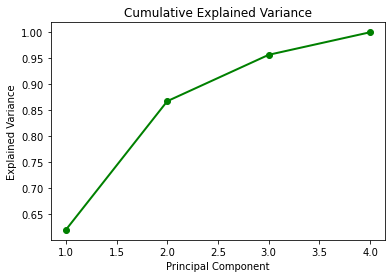

In [15]:
# calculate the cumulative variance
cumsum = np.cumsum(pca.explained_variance_ratio_)

# plot the cumulative variance
# the principal components are plotted on the x-axis
# the cumulative variance is plotted on the y-axis
plt.plot(PC_values, cumsum, 'go-', linewidth=2)

# Define the plots title
plt.title('Cumulative Explained Variance')

# Define the labels of the axes
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

plt.show()                   

At principal component 2 there is a cumulative explained variance of over 85%. 

### Clustering Techniques

Clustering techniques are used to discover natural groups within a dataset. The clustering techniques group observations into clusters based on the similarity or dissimilarity of the observations. The data has been scaled and I will use the following clustering techniques; Agglomerative Clustering and K-Means clustering. 

##### KMeans Clustering

C:\Users\natacha\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


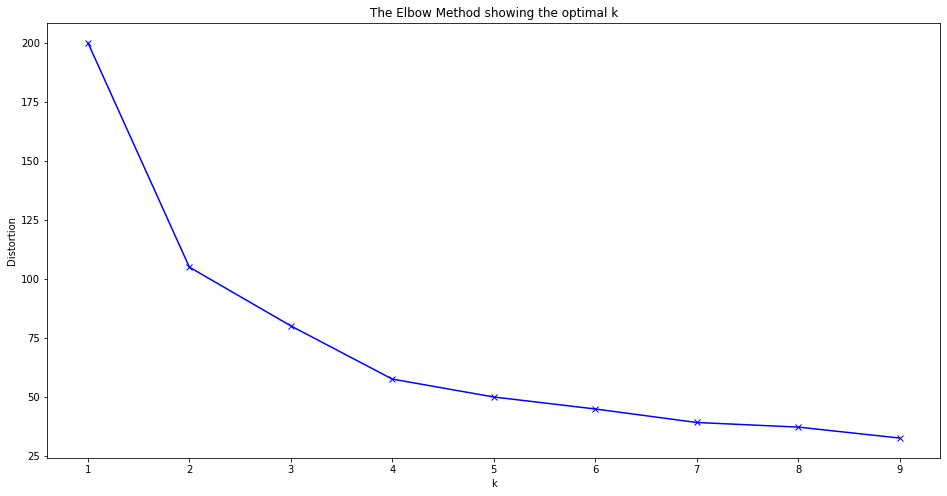

In [16]:
# Define an empty list which will store distortion
distortions = []

# Define the range for the number of clusters
K = range(1,10)
for k in K:
    # initialise a KMeans model with k clusters
    kmeanModel = KMeans(n_clusters=k)
    
    # fit the model with X
    kmeanModel.fit(X)
    
    # append the average of the squared distances from
    # the cluster centers
    distortions.append(kmeanModel.inertia_)

# define the size of the plot
plt.figure(figsize=(16,8))
# Define the x-axis to be k, the number of clusters
# and the y-axis the distortion,
# use 'blue x' as point color markers.
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The graph above indicates that the optimal number of clusters is 4.

In [27]:
# Create the kmeans classifier
# Set the number of clusters to 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter = 300, n_init=10, random_state=0)

# fit the standardised X values
k_fit = kmeans.fit(X)

# generate the clusters
clusters = k_fit.labels_

# view the clusters
clusters

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

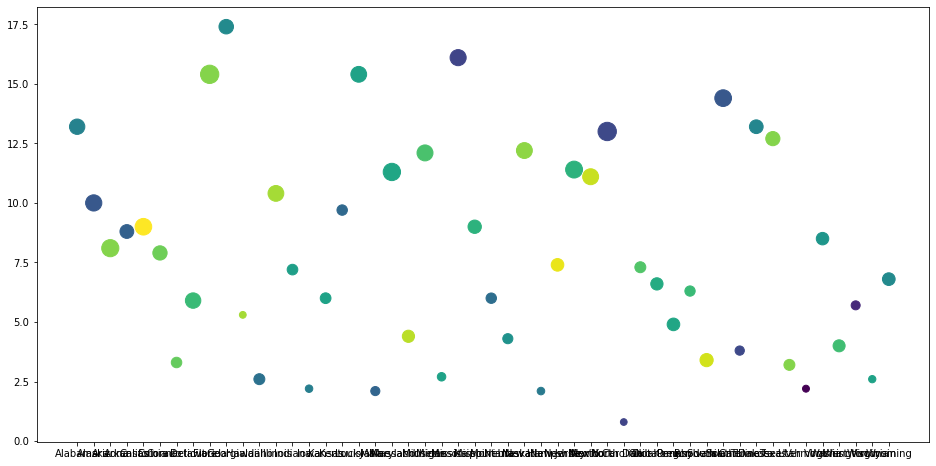

In [31]:
# Visulise the clusters

# define the size of the plot
plt.figure(figsize=(16,8))

# Visulise the clusters
plt.scatter(arrests_df.iloc[:,0],arrests_df.iloc[:,1],arrests_df.iloc[:,2],arrests_df.iloc[:,3],)

In [19]:
# Generate a DataFrame that indicates the cluster in which
# each state belongs to.
cluster_df = pd.DataFrame({"City": arrests_df['City'],"Clusters": clusters})
cluster_df.head()

,City,Clusters
0,Alabama,3
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1


### Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering whereby data points are grouped into clusters based on their similarity. Each data point forms its own cluster, then pairs of clusters are clustered together based on their similarities until there is one big cluster containing all data points.

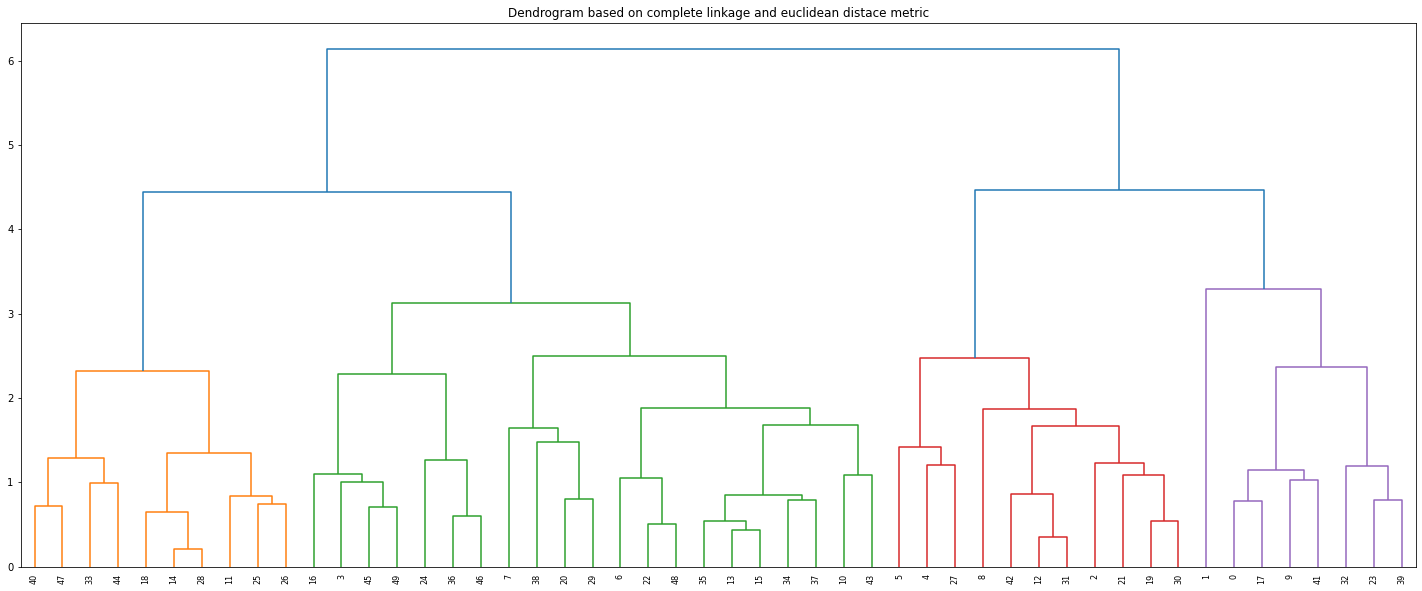

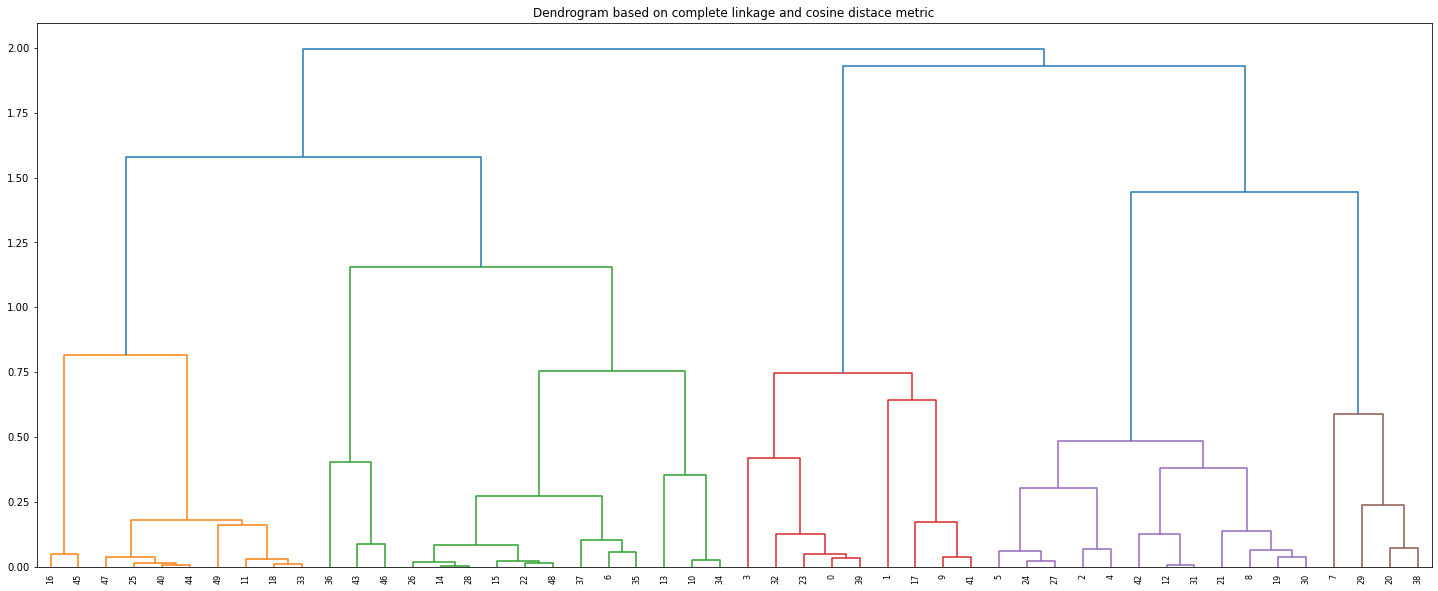

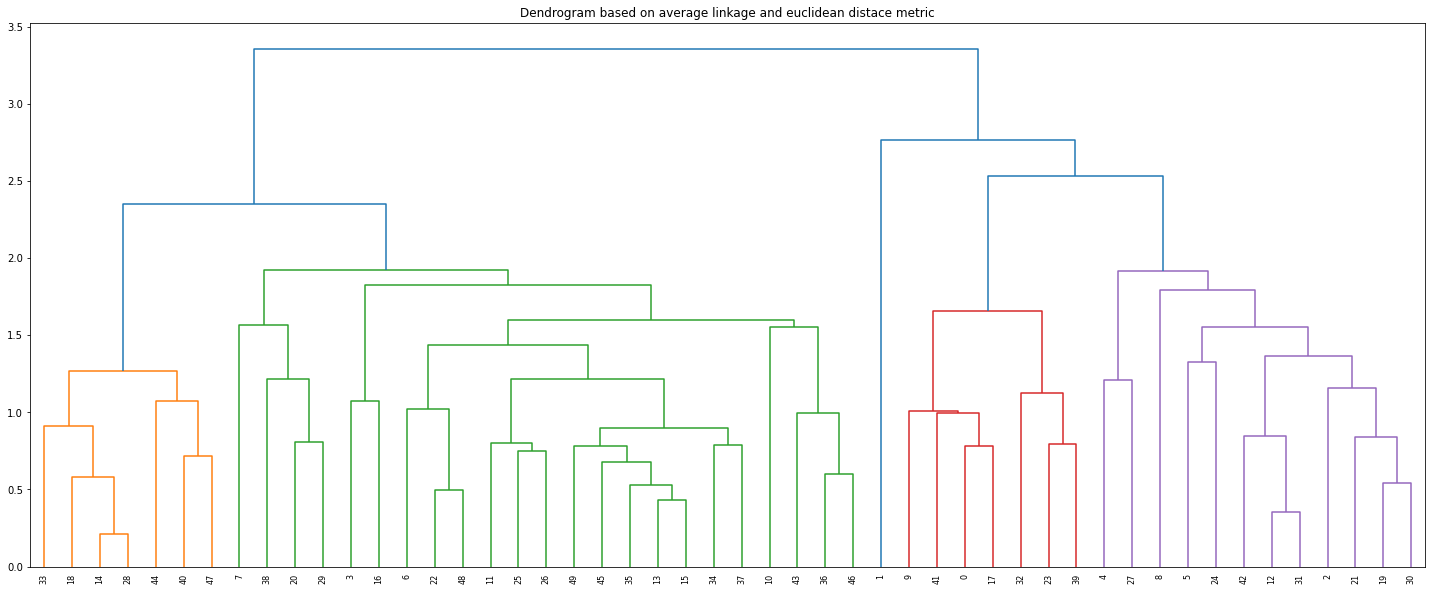

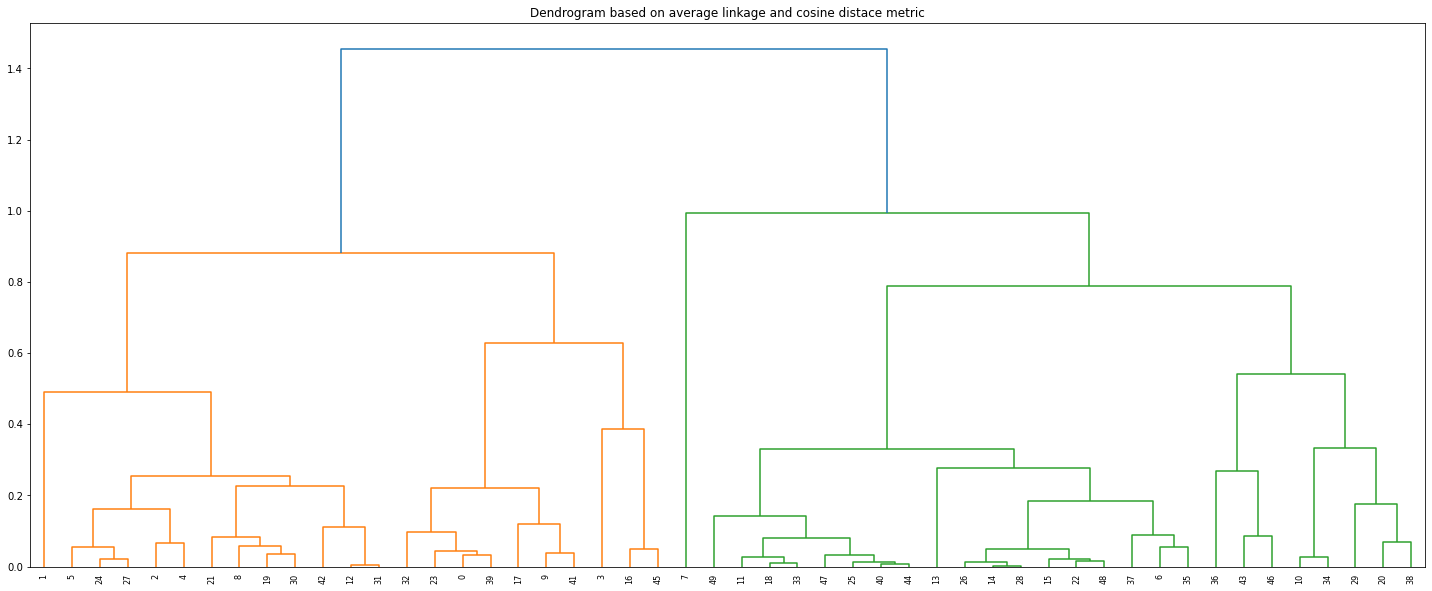

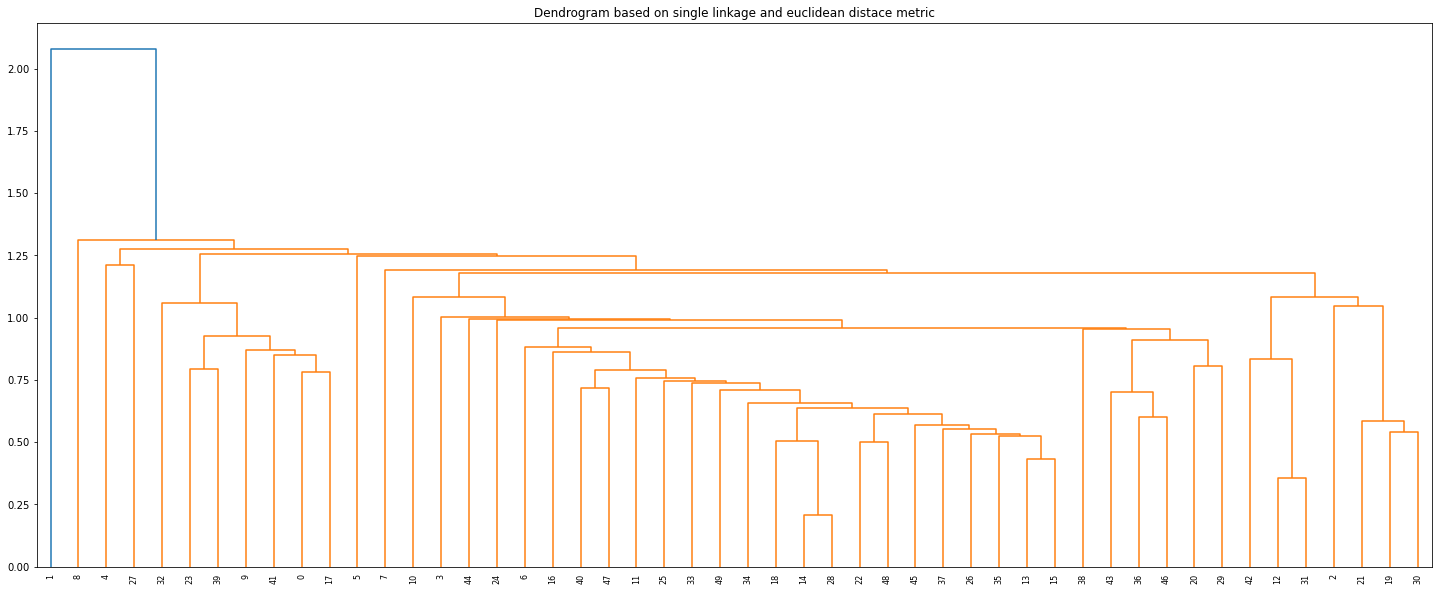

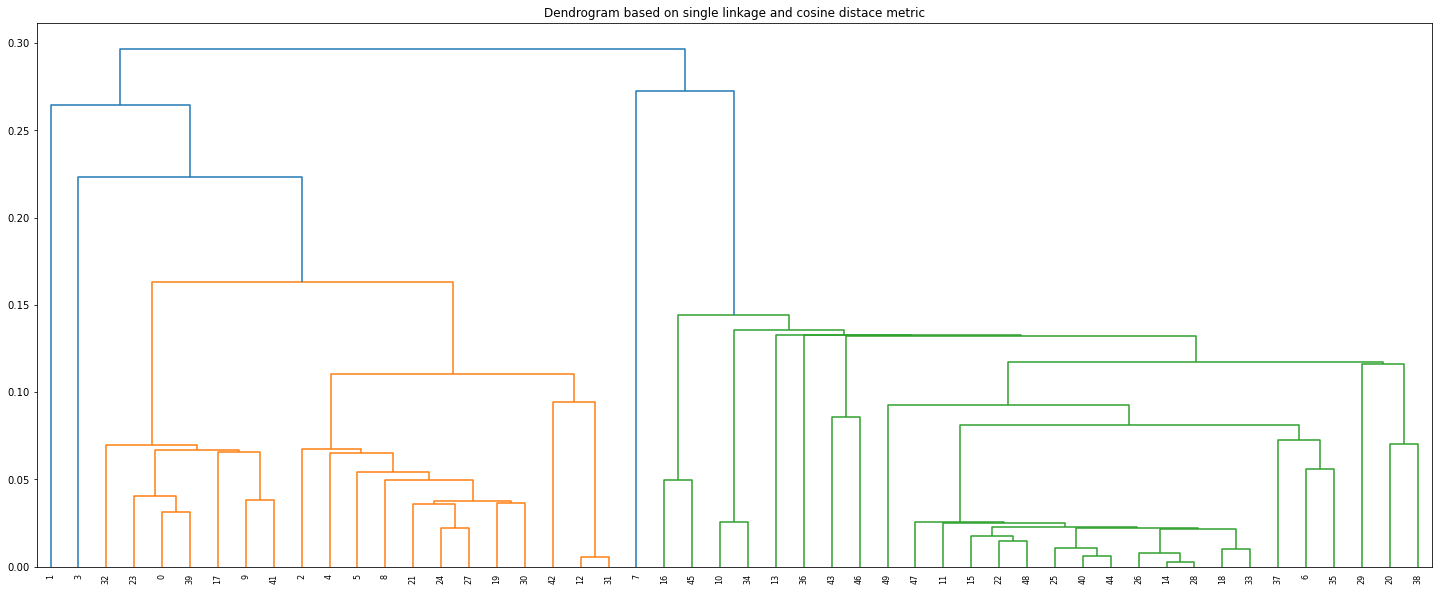

In [20]:
# Visualise Dendrograms generated
# using the linkage function, the first argument
# is the standardized X, followed by the chosen linkage method
# and lastly the distance metric.

# Define the different methods
linkage_methods = ['complete', 'average', 'single']

# Define the different metrics
dist_metrics = ['euclidean', 'cosine']

for i in linkage_methods:
    for j in dist_metrics:
        Z = linkage(X, method=i, metric=j)
        fig = plt.figure(figsize=(25, 10))
        plt.title('Dendrogram based on {} linkage and {} distace metric'.format(i,j))
        dn = dendrogram(Z)
        

Let's go ahead with the first dendrogram, where the linkage method is 'complete' and the distance metric is 'euclidean'. The chosen number of clusters is 2. 

In [25]:
# Define the Agglomerative clustering model
# set n_clusters= 2, method = 'complete', 
# and metric ='euclidean'
cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage= 'complete')

# fit the standardized X values to the clustering
# model
cluster.fit_predict(X)

# Compute the Silhuotte score of the model
score=silhouette_score(X, cluster.labels_, metric='euclidean')

print('The silhouette score is {}.'.format(score))

The silhouette score is 0.4047944502519567.


The above score is greater than -1 but closer to 0 than 1. This means that the above model was able to cluster some data points correctly but there was a large overlap between the data points.

##### Bibliography

1. US Arrests Kaggle dataset - https://www.kaggle.com/datasets/kurohana/usarrets

2. PCA - https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

3. Biplot - https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

4 - https://www.kaggle.com/code/berkayalan/usarrest-crime-kmeans-clustering-elbow/notebook